# COMPSCI 690V - Midterm - Text analysis and visualization

### Team members: 
1. Chao-Ching Chiang
2. Bailin Wang
3. Jin Zhang

### Datasets
* USA Geolocated Twitter dataset: http://followthehashtag.com/datasets/free-twitter-dataset-usa-200000-free-usa-tweets/

In [1]:
import numpy as np
import pandas as pd
from bokeh.io import output_notebook, push_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from utils import extract_hashtags, count_cooccurence

output_notebook()

Loading BokehJS ...

## Objective 1 - Analyze hashtags in tweets

* package networkx is required.

Out first goal it to analyze hashtags in tweets and rank them using different metrics.

In [2]:
fpath = './data/USA-Geolocated-tweets/dashboard_x_usa_x_filter_nativeretweets.xlsx'
df = pd.read_excel(fpath, sheetname='Stream')
tweets = df['Tweet content']
print('Number of tweets: {}'.format(len(tweets)))

Number of tweets: 204820


### Preprocessing
* extract the hashtags based on regular expression.
* we only extract hashtags that is important enough, thus we set a threshold for the count of hashtags so that we can observe the most influential ones.
* Based on the extracted hashtags, we construct a weighted, undirected graph based on their co-occurence in the tweets.

In [3]:
# Set the threshold for the hashtags. We only extract hashtags whose count is higher than the threshold. 
THRESHOLD = 700
PLOT1_PARAM = {'plot_height': 400, 'plot_width': 400, 'toolbar_location': None}

# Extract hashtags from tweets and count their co-occurence
id2word, word2id = extract_hashtags(tweets, THRESHOLD)
co_occurence = count_cooccurence(tweets, word2id)
words = list(word2id.keys())
nWords = len(words)

# Set up position for the nodes
theta = 2 * np.pi / nWords
circ = [i * theta for i in range(nWords)]
coord_x = [np.cos(i) for i in circ]
coord_y = [np.sin(i) for i in circ]

# Set up data source
s1 = ColumnDataSource(data=dict(x=coord_x, y=coord_y, hashtag=words))

# Draw the plots
hover1 = HoverTool(tooltips=[('Hashtag', '@hashtag')])
p1 = figure(title="Hashtag co-occurence graph", tools=[hover1], **PLOT1_PARAM)

# Draw the edges between the nodes
for (n1, n2), count in co_occurence.items():
    n1_x, n1_y = coord_x[n1], coord_y[n1]
    n2_x, n2_y = coord_x[n2], coord_y[n2]
    p1.line([n1_x, n2_x], [n1_y, n2_y], line_color="#949494")
scatter = p1.circle('x', 'y', source=s1, size=20)

# Add a hover tool to the co-occurence plot
hover1.renderers.append(scatter)


# Set up figure parameters
p1.grid.visible = False
p1.axis.visible = False
p1.outline_line_color = None
p1.title.text_font_size = '16px'

show(p1)

After we construct the co-occurenece graph, we use serveral metrics to evaluate the importance of these hashtags:
* Weighted PageRank
* Degree centrality
* Closeness centrality
* Betweenness centrality

### Clustering
We use K-means and SpectralClustering algorithm to cluster the hashtags. We build an interactive scatter plot to visualize the results.

Interactive version of it can be see running: 

        bokeh serve --show hashtag.py
        
### Observations

## Objective 2 - Analyze text in tweets

* package wordcloud is required. 

Firstly, we use word cloud to visualize some most common words in tweets like "hiring", "jobs" etc.

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

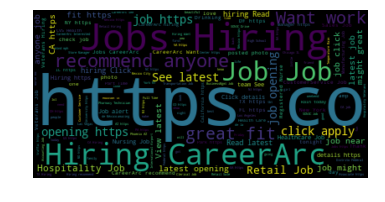

In [5]:
tweet_str = " ".join(tweets)
wordcloud = WordCloud(max_font_size=320).generate(tweet_str)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Then we try to cluster the tweets using K-means while each tweet is represented according to Bag of Words model.

### Preprocessing
* all numbers are replaced with a speical symbol \$NUM\$
* special character like #, ! are removed
* URL links are removed
* tokenization by space

### Clustering
run the following command 

       bokeh serve --show cluster.py
       
### Observations

